간단한 conv net 만들기
  - 데이터는 mnist 사용
  - conv - pool - conv - pool -conv - faltten - fc

In [ ]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
hist = model.fit(train_images,train_labels,epochs=10,batch_size=128,validation_data=(test_images,test_labels))

Epoch 1/10
469/469 [==============================] - 16s 8ms/step - loss: 0.2135 - accuracy: 0.9329 - val_loss: 0.0691 - val_accuracy: 0.9764
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0416 - val_accuracy: 0.9860
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0299 - val_accuracy: 0.9897
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0264 - val_accuracy: 0.9923
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0213 - accuracy: 0.9936 - val_loss: 0.0391 - val_accuracy: 0.9880
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0284 - val_accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 0.0267 - val_accuracy: 0.9923
Epoch

dog vs cat 분류

In [1]:
!unzip /content/drive/MyDrive/imgs/dogs-vs-cats.zip -d ./dogcat

Archive:  /content/drive/MyDrive/imgs/dogs-vs-cats.zip
  inflating: ./dogcat/sampleSubmission.csv  
  inflating: ./dogcat/test1.zip      
  inflating: ./dogcat/train.zip      


In [ ]:
!unzip /content/dogcat/test1.zip -d /content/dogcat
!unzip /content/dogcat/train.zip -d /content/dogcat

In [3]:
from glob import glob
import shutil

In [4]:
filepaths = glob('/content/dogcat/train/*')
plit_num = int(len(filepaths)*0.8)
train_filepaths = filepaths[:plit_num]
val_filepaths = filepaths[plit_num:]
len(train_filepaths), len(val_filepaths), len(filepaths)

(20000, 5000, 25000)

In [5]:
!mkdir /content/dogcat/train/dog
!mkdir /content/dogcat/train/cat
!mkdir /content/dogcat/val
!mkdir /content/dogcat/val/dog
!mkdir /content/dogcat/val/cat

In [6]:
def make_subset(subset_name,datapath):
  dog_path = '/content/dogcat/'+subset_name+'/dog/'
  cat_path = '/content/dogcat/'+subset_name+'/cat/'
  for fpath in datapath:
    if 'dog' in fpath.split('/')[-1]:
      shutil.move(src =fpath , dst =dog_path )
    elif 'cat' in fpath.split('/')[-1]:
      shutil.move(src =fpath , dst =cat_path )

make_subset('train',train_filepaths)
make_subset('val',val_filepaths)

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory
train_data_set = image_dataset_from_directory(
    "/content/dogcat/train/",
    image_size = (180,180),
    batch_size=32
)
val_data_set = image_dataset_from_directory(
    "/content/dogcat/val/",
    image_size = (180,180),
    batch_size=32
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
for data_batch, label_batch in train_data_set:
  print(f"데이터 배치 크기 : {data_batch.shape}")
  print(f"라벨 배치 크기 : {label_batch.shape}")
  break
for data_batch, label_batch in val_data_set:
  print(f"데이터 배치 크기 : {data_batch.shape}")
  print(f"라벨 배치 크기 : {label_batch.shape}")
  break

데이터 배치 크기 : (32, 180, 180, 3)
라벨 배치 크기 : (32,)
데이터 배치 크기 : (32, 180, 180, 3)
라벨 배치 크기 : (32,)


In [9]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(180, 180, 3))
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.compile(loss = tf.keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [51]:
# shutil.rmtree('/content/dogcat')

In [ ]:
hist = model.fit(
   train_data_set,
   epochs=30,
   validation_data=val_data_set
)

In [13]:
model.save('vision01.h5')

In [14]:
new_model = tf.keras.models.load_model('./vision01.h5')

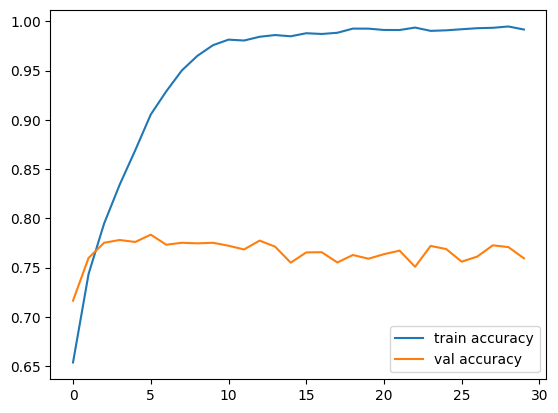

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

In [ ]:
new_model.summary()

In [17]:
test1_file = glob('/content/dogcat/test1/*')[0]

In [20]:
predict = new_model.predict(train_data_set)

625/625 [==============================] - 29s 44ms/step


In [29]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img(test1_file,target_size=(180,180))
img = img_to_array(img)
img = img.reshape(1,180,180,3)
img.shape
# new_model.predict(test1_file)

(1, 180, 180, 3)

In [31]:
predict_one = new_model.predict(img)
predict_one

1/1 [==============================] - 0s 20ms/step


array([[0.99999905]], dtype=float32)

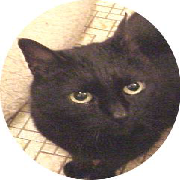

In [34]:
load_img(test1_file,target_size=(180,180))

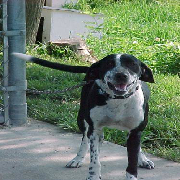

In [40]:
test = glob('/content/dogcat/train/dog/*')[0]
load_img(test,target_size=(180,180))

In [41]:
img = load_img(test,target_size=(180,180))
img = img_to_array(img)
img = img.reshape(1,180,180,3)
predict_one = new_model.predict(img)
if predict_one > 0.5:
  print("개")
else:
  print('고양이')

1/1 [==============================] - 0s 21ms/step
개


데이터 증대

In [43]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2)
])

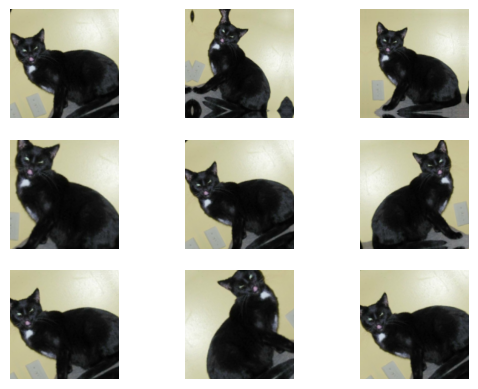

In [46]:
for images, _ in train_data_set.take(10):
  for i in range(9):
    augmentation_images = data_augmentation(images)
    plt.subplot(3,3,i+1)
    plt.imshow(augmentation_images[0].numpy().astype('uint8'))
    plt.axis('off')

이미지 증식 + 드랍아웃을 적용한 conv net

In [47]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = tf.keras.layers.Rescaling(1./255)(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss = tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [48]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('vision02.h5', save_best_only=True)
]
hist = model.fit(train_data_set,epochs=30,
                 validation_data=val_data_set,callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 52s 78ms/step - loss: 0.6559 - accuracy: 0.6319 - val_loss: 0.5578 - val_accuracy: 0.7144
Epoch 2/30
625/625 [==============================] - 40s 64ms/step - loss: 0.5521 - accuracy: 0.7217 - val_loss: 0.4859 - val_accuracy: 0.7736
Epoch 3/30
625/625 [==============================] - 42s 67ms/step - loss: 0.5188 - accuracy: 0.7500 - val_loss: 0.4991 - val_accuracy: 0.7620
Epoch 4/30
625/625 [==============================] - 42s 67ms/step - loss: 0.4927 - accuracy: 0.7643 - val_loss: 0.4574 - val_accuracy: 0.7926
Epoch 5/30
625/625 [==============================] - 42s 67ms/step - loss: 0.4713 - accuracy: 0.7788 - val_loss: 0.4959 - val_accuracy: 0.7690
Epoch 6/30
625/625 [==============================] - 40s 63ms/step - loss: 0.4528 - accuracy: 0.7890 - val_loss: 0.4081 - val_accuracy: 0.8210
Epoch 7/30
625/625 [==============================] - 37s 59ms/step - loss: 0.4421 - accuracy: 0.8008 - val_loss: 0.4282 - val_accuracy:

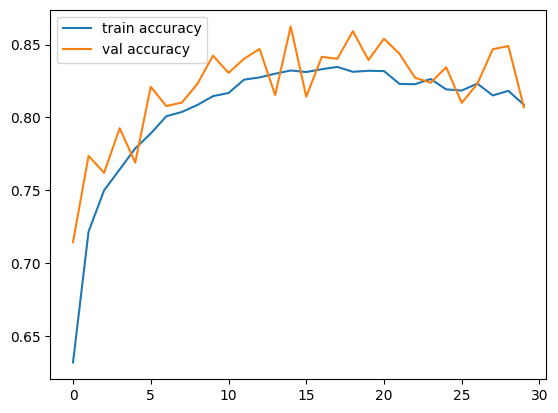

In [49]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 77ms/step
[[0.02088904]]
1/1 [==============================] - 0s 20ms/step
[[0.01571033]]
1/1 [==============================] - 0s 19ms/step
[[0.18267547]]
1/1 [==============================] - 0s 23ms/step
[[0.00236622]]
1/1 [==============================] - 0s 20ms/step
[[0.81324995]]
1/1 [==============================] - 0s 21ms/step
[[0.32825276]]
1/1 [==============================] - 0s 21ms/step
[[0.99719954]]
1/1 [==============================] - 0s 21ms/step
[[0.15173006]]
1/1 [==============================] - 0s 19ms/step
[[0.62794596]]
1/1 [==============================] - 0s 20ms/step
[[0.99149793]]


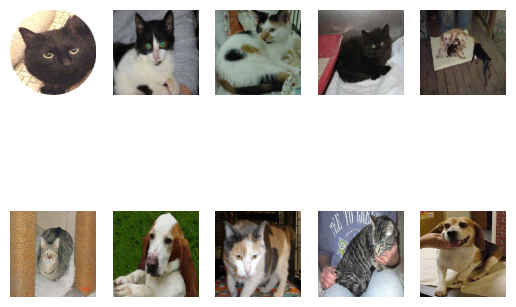

In [52]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/vision02.h5')

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
test1_files = glob('/content/dogcat/test1/*')[:10]

for idx,file in enumerate( test1_files):
  img = load_img(file,target_size=(180,180))
  plt.subplot(2,5,idx+1)
  plt.imshow(img)
  plt.axis('off')

  img = img_to_array(img)
  img = img.reshape(1,180,180,3)
  print(new_model.predict(img))

사전훈련된 모델 사용하기
  - 전이학습
  - VGG16

In [57]:
conv_base =  tf.keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top=False,
    input_shape=(180,180,3)
)

In [58]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

전이학습 모델에 맞는 데이터구조를 맞춰줘야함
  - conv 층을 이용해서 데이터의 특성들을 추출(학습)

In [ ]:
import numpy as np
def get_feature_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprecessed_images = tf.keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprecessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features),np.concatenate(all_labels)

train_feature, train_labels =  get_feature_and_labels(train_data_set)
val_feature, val_labels =  get_feature_and_labels(val_data_set)

분류기에 연결하고 훈련

In [61]:
inputs = tf.keras.Input(shape=(5, 5, 512))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(256,activation='sigmoid')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(inputs,outputs)
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer='adam',metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("vision03.h5",save_best_only=True)
]
hist = model.fit(train_feature,train_labels,epochs=20,
          validation_data=(val_feature,val_labels), callbacks = callbacks)

Epoch 1/20
625/625 [==============================] - 5s 6ms/step - loss: 0.0877 - accuracy: 0.9685 - val_loss: 0.0657 - val_accuracy: 0.9752
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0698 - accuracy: 0.9754 - val_loss: 0.0654 - val_accuracy: 0.9774
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0664 - accuracy: 0.9758 - val_loss: 0.0619 - val_accuracy: 0.9776
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0622 - accuracy: 0.9780 - val_loss: 0.0664 - val_accuracy: 0.9748
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 0.0659 - accuracy: 0.9769 - val_loss: 0.0635 - val_accuracy: 0.9758
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0573 - accuracy: 0.9796 - val_loss: 0.0627 - val_accuracy: 0.9774
Epoch 7/20
625/625 [==============================] - 3s 4ms/step - loss: 0.0571 - accuracy: 0.9792 - val_loss: 0.0598 - val_accuracy: 0.9776
Epoch 

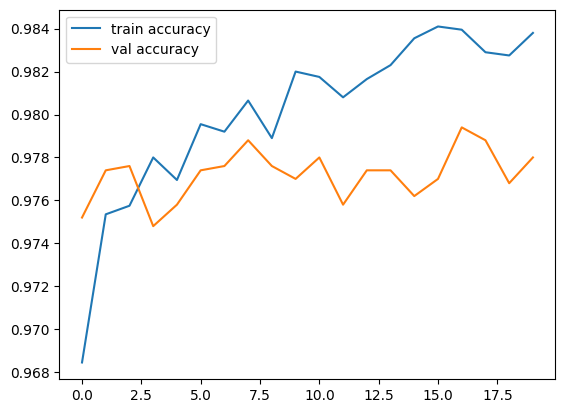

In [62]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

데이터 증식을 통해 특징을 추출 - conv
  -  가중치를 기존 모델이 가지고 있는 걸 사용해서 특성을추출
  -  가중치 동결

In [64]:
conv_base =  tf.keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top=False
)
conv_base.trainable = False # 가중치 동결

In [66]:
conv_base.trainable = True
len(conv_base.trainable_weights)

26

In [67]:
conv_base.trainable = False
len(conv_base.trainable_weights)

0

데이터 증식 추가하기

In [68]:
inputs = tf.keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = tf.keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256,activation='sigmoid')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(inputs,outputs)
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer='adam',metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("vision04.h5",save_best_only=True)
]
hist = model.fit(train_data_set,epochs=20,
          validation_data=val_data_set, callbacks = callbacks)

Epoch 1/20
625/625 [==============================] - 78s 121ms/step - loss: 0.1328 - accuracy: 0.9474 - val_loss: 0.0680 - val_accuracy: 0.9762
Epoch 2/20
625/625 [==============================] - 81s 129ms/step - loss: 0.1098 - accuracy: 0.9566 - val_loss: 0.0649 - val_accuracy: 0.9756
Epoch 3/20
625/625 [==============================] - 74s 118ms/step - loss: 0.1055 - accuracy: 0.9603 - val_loss: 0.0622 - val_accuracy: 0.9760
Epoch 4/20
625/625 [==============================] - 74s 118ms/step - loss: 0.1026 - accuracy: 0.9597 - val_loss: 0.0618 - val_accuracy: 0.9752
Epoch 5/20
625/625 [==============================] - 75s 119ms/step - loss: 0.1003 - accuracy: 0.9609 - val_loss: 0.0611 - val_accuracy: 0.9752
Epoch 6/20
625/625 [==============================] - 74s 118ms/step - loss: 0.0998 - accuracy: 0.9594 - val_loss: 0.0596 - val_accuracy: 0.9770
Epoch 7/20
625/625 [==============================] - 75s 119ms/step - loss: 0.0997 - accuracy: 0.9603 - val_loss: 0.0617 - val_ac

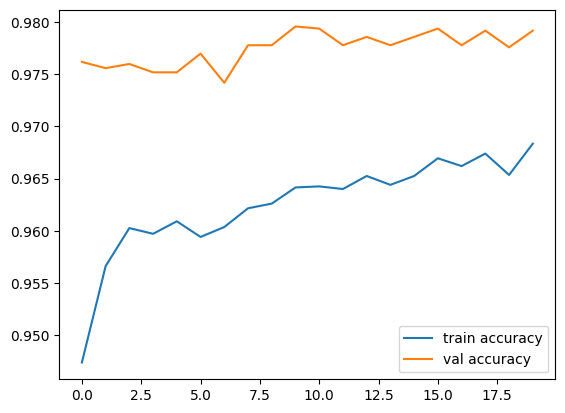

In [69]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

In [70]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

가중치 미세조정
  - fine tuning
  - 마지막 블럭만 고정


In [72]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable=False

In [ ]:
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer='adam',metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("vision_fine_tuning.h5",save_best_only=True)
]
hist = model.fit(train_data_set,epochs=20,
          validation_data=val_data_set, callbacks = callbacks)